In [8]:
#import numpy as np
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import csv

In [9]:
with open('train2.csv', 'w', newline='') as csvfile:
    fieldnames = ['works','value','students','classWidth','classLength']
    mlwriter = csv.DictWriter(csvfile,fieldnames=fieldnames)
    mlwriter.writeheader()

In [10]:
def objective(z):
    p = 0
    #real students to fake students/boundary
    r = 2
    fakeStudents = 0
    fstudents = []
    for i in range(0,class_x-chair_l+1):
        fstudents.append(i)
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
        fakeStudents = fakeStudents + 2
    for i in range(0,class_y-chair_l+1):
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
        fakeStudents = fakeStudents + 2
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        fstudents.append(-r+i)
        fstudents.append(-i)
        fakeStudents = fakeStudents + 4
        
    #start p computations
    for i in range(int(len(z)/3)):
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x1 = z[i*3]
            y1 = z[i*3+1]
            d1 = z[i*3+2]
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2] 
                x2 = z[j*3]
                y2 = z[j*3+1]
                
                #depends on angle of first student
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

def addChair(x,y,d):
    #update classroom
    #print(chair_l)
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
    
    #add chair
    chairs.append([x,y,d])

In [11]:
students = 5 #5
chair_l = 2 #2
class_y = 20 #20
class_x = 20 #20

for x in range(class_x,30):
    for y in range(class_y,40):
        for s in range(students,20):
            for repeat in range(2):
                #set up arrays
                chairs = []
                classroom = [[0 for i in range(class_x)] for j in range(class_y)]
                
                #actual bounds
                bnds = ()
                x_bnd = (0,class_x-2)
                y_bnd = (0,class_y-2)
                d_bnd = (0,4*math.pi)
                for i in range(students):
                    bnds = bnds + (x_bnd,y_bnd,d_bnd)

                #guess
                guess = []
                for i in range(students):
                    guess.append(random()*class_x)
                    guess.append(random()*class_y)
                    guess.append(2*math.pi)
                cons = []

                sol = minimize(objective,guess,method='SLSQP',\
                                bounds=bnds,constraints=cons)

                #adding chairs        
                for i in range(students):
                    addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2]))


                with open('train2.csv', 'a', newline='') as csvfile:
                    fieldnames = ['works','value','students','classWidth','classLength']
                    mlwriter = csv.DictWriter(csvfile,fieldnames=fieldnames)
                    mlwriter.writerow({'works': 1, 'value': sol.fun, 'students': s, 'classWidth': x, 'classLength': y})
                    #mlwriter.writerow({'works': 1, 'value': sol.fun, 'students': students, 'classWidth': class_x, 'classLength': class_y}) 

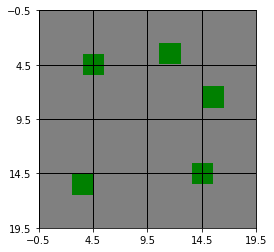

[15, 7, 225]
[4, 4, 315]
[14, 14, 135]
[11, 3, 225]
[3, 15, 45]


In [13]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()
for chair in chairs:
    print(chair)